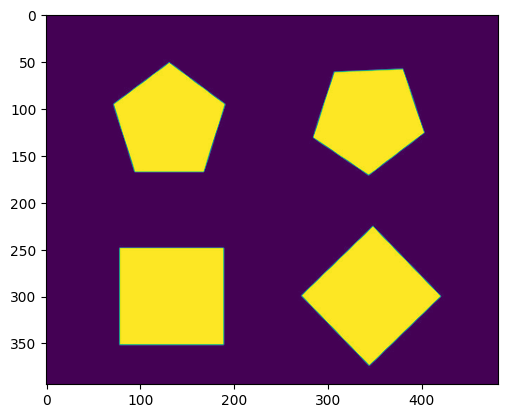

In [10]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('../dataset_images/shapes.jpg',0)
plt.imshow(image)

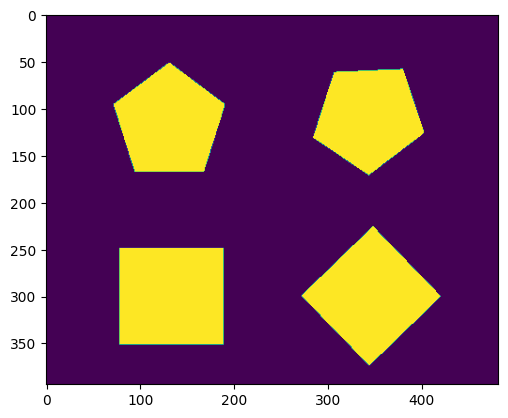

In [11]:
retval , threshold = cv2.threshold(image , 110 , 255 , cv2.THRESH_BINARY)

plt.imshow(threshold);

In [15]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [18]:
img2 = np.copy(image)

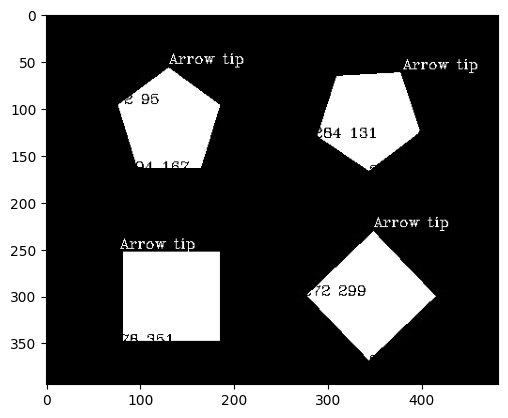

In [25]:
# Going through every contours found in the image. 
for cnt in contours : 
  
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True) 
  
    # draws boundary of contours. 
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)  
  
    # Used to flatted the array containing 
    # the co-ordinates of the vertices. 
    n = approx.ravel()  
    i = 0
  
    for j in n : 
        if(i % 2 == 0): 
            x = n[i] 
            y = n[i + 1] 
  
            # String containing the co-ordinates. 
            string = str(x) + " " + str(y)  
  
            if(i == 0): 
                # text on topmost co-ordinate. 
                cv2.putText(img2, "Arrow tip", (x, y), cv2.FONT_HERSHEY_COMPLEX 
                                , 0.5, (255, 0, 0))  
            else: 
                # text on remaining co-ordinates. 
                cv2.putText(img2, string, (x, y),  cv2.FONT_HERSHEY_COMPLEX ,
                           0.5, (0, 255, 0))  
        i = i + 1
  
plt.imshow(img2,cmap = 'gray')